In [1]:
import yfinance as yf
import time
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from prophet import Prophet

In [2]:
tick = ['ZEC-USD']
start_date = datetime(2023, 10, 1).strftime('%Y-%m-%d')
end_date = datetime(2024, 10, 1).strftime('%Y-%m-%d')

In [3]:
df = yf.download(tick, start= start_date , end = end_date )[['Close']]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
df.isnull().sum()

Price  Ticker 
Close  ZEC-USD    0
dtype: int64

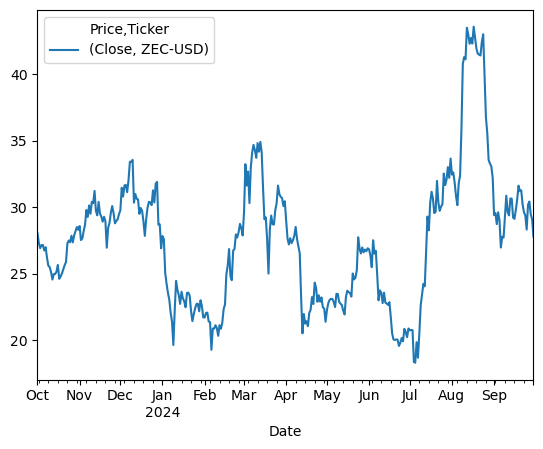

In [5]:
#first visualise data 
df.plot()
plt.show()

In [6]:
df

Price,Close
Ticker,ZEC-USD
Date,
2023-10-01,28.063318
2023-10-02,27.304394
2023-10-03,26.915659
2023-10-04,27.146259
2023-10-05,27.155380
...,...
2024-09-26,30.190125
2024-09-27,30.426661


13:11:51 - cmdstanpy - INFO - Chain [1] start processing
13:11:51 - cmdstanpy - INFO - Chain [1] done processing


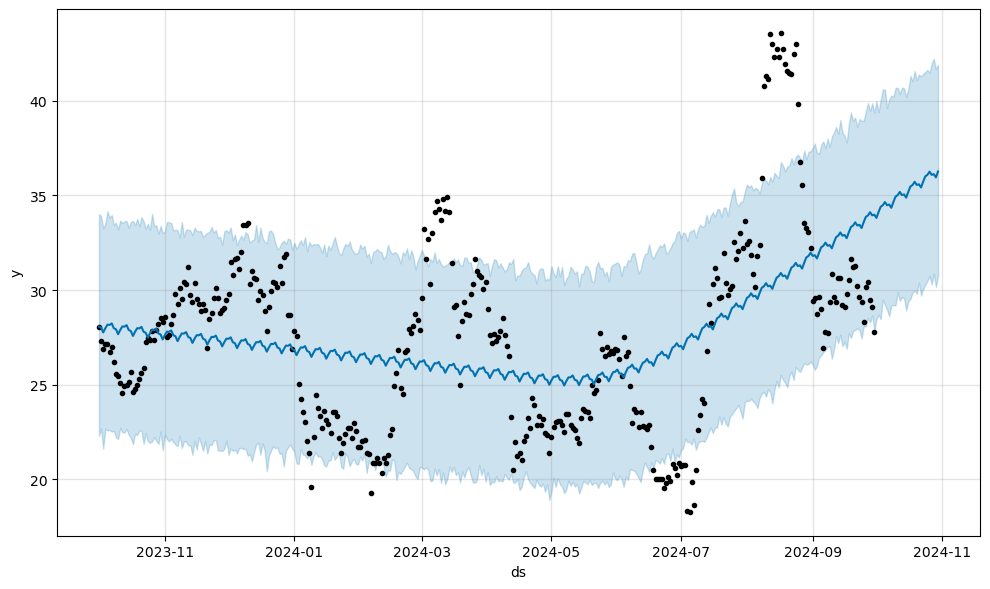

In [ ]:
df_prophet = df.reset_index()[['Date', 'Close']]
df_prophet.columns = ['ds', 'y']

model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=30) 

forecast = model.predict(future)


model.plot(forecast)
plt.show()

In [17]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-10-01,28.102940,22.073303,33.514557,28.102940,28.102940,-0.024026,-0.024026,-0.024026,-0.024026,-0.024026,-0.024026,0.0,0.0,0.0,28.078914
1,2023-10-02,28.089804,22.476545,33.820887,28.089804,28.089804,-0.064090,-0.064090,-0.064090,-0.064090,-0.064090,-0.064090,0.0,0.0,0.0,28.025714
2,2023-10-03,28.076668,22.757516,33.647471,28.076668,28.076668,-0.311297,-0.311297,-0.311297,-0.311297,-0.311297,-0.311297,0.0,0.0,0.0,27.765371
3,2023-10-04,28.063532,22.750130,33.711185,28.063532,28.063532,-0.074071,-0.074071,-0.074071,-0.074071,-0.074071,-0.074071,0.0,0.0,0.0,27.989462
4,2023-10-05,28.050396,22.496818,33.637726,28.050396,28.050396,0.126234,0.126234,0.126234,0.126234,0.126234,0.126234,0.0,0.0,0.0,28.176630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,2024-10-26,36.039183,30.746355,41.759096,35.931830,36.138473,0.219933,0.219933,0.219933,0.219933,0.219933,0.219933,0.0,0.0,0.0,36.259116
392,2024-10-27,36.115667,29.999241,41.429938,36.000491,36.221377,-0.024026,-0.024026,-0.024026,-0.024026,-0.024026,-0.024026,0.0,0.0,0.0,36.091641
393,2024-10-28,36.192151,30.442548,42.038904,36.066542,36.302881,-0.064090,-0.064090,-0.064090,-0.064090,-0.064090,-0.064090,0.0,0.0,0.0,36.128061
394,2024-10-29,36.268634,30.199752,41.526543,36.137733,36.387238,-0.311297,-0.311297,-0.311297,-0.311297,-0.311297,-0.311297,0.0,0.0,0.0,35.957337


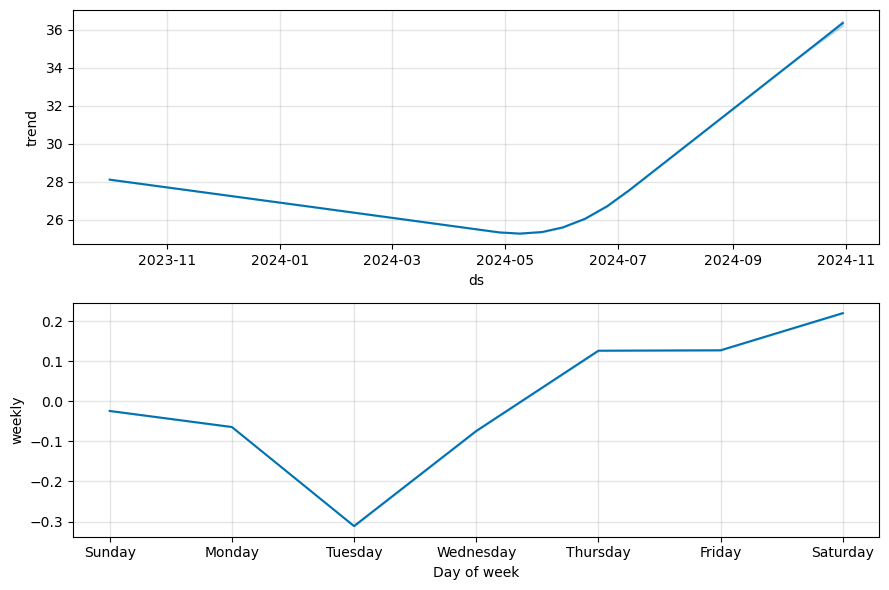

In [16]:
model.plot_components(forecast)
plt.show()